# **INTRODUCTION**

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty.

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

In this project, I am going to explore this data collection from Washington Post to have some ideas how excessive force differentiated between states and cities in USA. Are the number keeping getting more and more over year?


## **Upgrade Plotly**

Run the cell below if you are working with Google Colab

In [ ]:
%pip install --upgrade plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 71.4 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [ ]:
%pip install us

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 7.7 MB/s eta 0:00:00
  Created wheel for us: filename=us-3.1.1-py3-none-any.whl size=12546 sha256=72a31a948364593620bbe1d1ec7ffc9e0efd1bab4b16ef4ff2d1a688dde46ea8
  Stored in directory: /root/.cache/pip/wheels/da/f9/64/9669135a7ce533faf78e3b32259c505f964f03b069be6844f8
Successfully built us


## **Import Statements**

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.dates as mdates
import us

## **Notebook Presentation**

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

## **Load the Data**

In [ ]:
df_fatalities = pd.read_csv('fatal-police-shootings-data.csv', encoding="windows-1252")

# **PRELIMINARY DATA EXPLORATION**

* What is the shape of the DataFrames?
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

## **General checking**

  ### ***Data Overview***


In [ ]:
df_fatalities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8768 entries, 0 to 8767
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          8768 non-null   int64  
 1   date                        8768 non-null   object 
 2   threat_type                 8721 non-null   object 
 3   flee_status                 7578 non-null   object 
 4   armed_with                  8558 non-null   object 
 5   city                        8711 non-null   object 
 6   county                      3912 non-null   object 
 7   state                       8768 non-null   object 
 8   latitude                    7780 non-null   float64
 9   longitude                   7780 non-null   float64
 10  location_precision          7780 non-null   object 
 11  name                        8186 non-null   object 
 12  age                         8163 non-null   float64
 13  gender                      8719 

### ***Check NaN values***


In [ ]:
#Check if any column has any NaN values
df_fatalities.isna().any()

id                            False
date                          False
threat_type                    True
flee_status                    True
armed_with                     True
city                           True
county                         True
state                         False
latitude                       True
longitude                      True
location_precision             True
name                           True
age                            True
gender                         True
race                           True
race_source                    True
was_mental_illness_related    False
body_camera                   False
agency_ids                    False
dtype: bool

In [ ]:
#Create combination of columns need to fill NaN value with different values
col_unknown = ['gender','race','race_source', 'flee_status',
               'city', 'county', 'location_precision', 'name']
col0 = ['age', 'latitude', 'longitude']
col_undetermine = ['threat_type','armed_with']

#Fill NaN value
df_fatalities[col_unknown] = df_fatalities[col_unknown].fillna('unknown')
df_fatalities[col0] = df_fatalities[col0].fillna(0)
df_fatalities[col_undetermine] = df_fatalities[col_undetermine].fillna('undetermined')

### ***Check duplicated values***

In [ ]:
#Check duplicated value
df_fatalities.duplicated().values.any()

False

## **Column's checking and covert type**

### ***Convert date column to Datetime***

In [ ]:
#Convert date column to Datetime
df_fatalities['date'] = pd.to_datetime(df_fatalities['date'])

### ***Add State name column***

In [ ]:
#Use us package to extract all US state name
state_name =[]
for s in df_fatalities['state']:
  try:
    name = us.states.lookup(s).name
  except AttributeError:
    name = 'Washington DC'
  finally:
    state_name.append(name)

#add column state name to dataframe
df_fatalities.insert(8,'state name', state_name)

### ***Add Year & Month & Day of Year columns***

In [ ]:
#Add year column
df_fatalities.insert(loc=2,
                     column='Year',
                     value = df_fatalities['date'].dt.year)
#Add month column
df_fatalities.insert(loc=3,
                     column='Month',
                     value = df_fatalities['date'].dt.month)
#Add Day Of year (doy) column
df_fatalities.insert(loc=2,
                     column='doy',
                     value = df_fatalities['date'].dt.dayofyear)

# **DATA VISUALISATION**

## **Number of fatal police shooting yearly (Line Chart)**

Analyse the Number of Police Killings over Time. Is there a trend in the data?

In [ ]:
#Create pivot table to show number of cases every year
pv = df_fatalities.pivot_table(index='doy',
                                         columns='Year',
                                         values='id',
                                         aggfunc='count')
pv.fillna(0,inplace=True)

In [ ]:
#Cummulative Sum number daily each year
pv = pv.cumsum()

In [ ]:
pv

Year,2015,2016,2017,2018,2019,2020,2021,2022,2023
doy,,,,,,,,,
1,0.00,1.00,6.00,3.00,2.00,4.00,3.00,2.00,2.00
2,2.00,4.00,6.00,6.00,5.00,10.00,5.00,3.00,10.00
3,3.00,5.00,8.00,7.00,11.00,10.00,8.00,6.00,14.00
4,6.00,7.00,12.00,9.00,15.00,11.00,10.00,10.00,15.00
5,7.00,13.00,14.00,12.00,20.00,17.00,15.00,14.00,20.00
...,...,...,...,...,...,...,...,...,...
362,990.00,950.00,977.00,984.00,984.00,999.00,"1,043.00","1,084.00",680.00
363,992.00,951.00,978.00,985.00,988.00,"1,007.00","1,045.00","1,089.00",680.00
364,994.00,952.00,981.00,988.00,991.00,"1,012.00","1,046.00","1,093.00",680.00


In [ ]:
#Data Visualisation
exp_line = go.Figure(layout=dict(title=dict(font=dict(size=30),text='<b>Number of case per year</b>'),
                                 xaxis=dict(title=dict(font=dict(size=20),text='<b><i>Month</i></b>'),
                                            tickmode='array',
                                            tickvals=np.linspace(0,366,13)[:-1],
                                            ticktext=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
                                            tickfont=dict(size=15),
                                            linecolor='grey',
                                            gridcolor='lightgrey',
                                            griddash='dot'),
                                 yaxis=dict(title=dict(font=dict(size=20),text='<b><i>Number of Cases</i></b>'),
                                            range=[0,1100],
                                            tick0=0,
                                            tickfont=dict(size=15),
                                            linecolor='grey',
                                            gridcolor='lightgrey',
                                            griddash='dot'
                                            ),
                                 plot_bgcolor='white',
                                 legend=dict(itemclick='toggleothers')))



for col in pv.columns:
  if col  == 2023:
    exp_line.add_trace(go.Scatter(x=pv.index[:276],
                                y=pv[col][:276],
                                mode='lines',
                                name=col,
                                line=dict(width=4, color='#B31312'),
                                text=pd.to_datetime(pv[col].name *1000 + pv.index, format='%Y%j').strftime('%b-%d')
                                ))


  else:
    exp_line.add_trace(go.Scatter(x=pv.index.get_level_values('doy'),
                                y=pv[col],
                                mode='lines',
                                name=col,
                                text=pd.to_datetime(pv[col].name *1000 + pv.index, format='%Y%j').strftime('%b-%d')
                                  ))

  exp_line.update_traces(hovertemplate="<b>%{text}</b> <br><br> Total number: %{y}")



exp_line.show()

Number of fatal police shooting has increased in recent years. 2022 was recorded as the year has the highest number of people killed by police at 1096 cases at the end of the year.
<br>
On the bright side, the number of people got killed by police in 2023 is lower than other years at the end of October.

## **Percentage of Race and Ethnicity Killed by Police (Pie Chart)**

In [ ]:
#Split the value in race column and stack
killed_by_race = df_fatalities['race'].str.split(';',expand=True).stack()

#Create new series
num_killed_by_race = killed_by_race.value_counts()

In [ ]:
#Create pie chart to visualize percentage of race and ethnicity killed by police
fig = px.pie(values=num_killed_by_race.values,
             names=['White', 'Black', 'Unkown',
                    'Hispanic','Asian', 'Native American', 'Other'],
             title='<b>Percentage Killed by Race</b>',
             )
fig.update_traces(textposition='outside',
                  textinfo='percent+label',
                  textfont_size=12,
                  marker=dict(line=dict(color='#000000',
                                        width=2)),
                  pull=[0.2,0,0,0,0,0,0])

fig.update_layout(title={'font': {'size': 25},
                         'automargin':True,
                         'x':0.01,
                         'y':0.9},
                  legend={'font':{'size':20},
                          'x':1,
                          'y':0.5})
fig.show()

As we can see from the Pie chart above, White people has the highest number of the people shot and killed by police at 3763 cases, accounts for roughly 43 percent of the U.S.
<br>
Standing at second place is Black people which is not a surprise at all as a lot of protests happened recently fighting for "Black Lives Mattter".

## **Percentage of Gender Killed by Police (Pie Chart)**

In [ ]:
#Create dataframe show killed number by gender
gender_df = df_fatalities.groupby('gender', as_index=False).size()
gender_df

,gender,size
0,female,382
1,male,8336
2,non-binary,1
3,unknown,49


In [ ]:
#Create pie chart to visualize percentage of gender killed by police
fig = px.pie(gender_df,
             values='size',
             names=['Female','Male','Non-binary', 'Unknown'],
             color_discrete_sequence=px.colors.qualitative.T10,
             title='<b>Percentage Killed by Gender</b>',
             hole=0.4)
fig.update_traces(textposition='outside',
                  textinfo='percent+label',
                  textfont_size=13,
                  marker = dict(line = dict(color='#000000', width=2)),
                  pull=[0.2,0.2,0,0])

fig.update_layout(title={'font': {'size': 20},
                         'automargin':True,
                         'x':0.01,
                         'y':0.9},
                  legend={'font':{'size':20},
                          'x':0.7,
                          'y':0.5})

fig.show()

There're not anything out of our expectation when 95.1% of cases are Male.

## **Percentage of people killed have mental issues (Pie Chart)**


In [ ]:
ill_df = df_fatalities.groupby('was_mental_illness_related',as_index=False).size()

In [ ]:
ill_df

,was_mental_illness_related,size
0,False,6981
1,True,1787


In [ ]:
ill_pie = px.pie(ill_df,
             names = ['<b>False</b>','<b>True</b>'],
             values= 'size' ,
             color_discrete_sequence=px.colors.qualitative.Antique,
             title='<b>Mental Illness Percentage of People Killed</b>')
ill_pie.update_traces(textposition='inside',
                  textinfo='percent+label',
                  textfont_size=13,
                   hovertemplate='<b>%{label} </b> <br> Number: %{value}<br>Percentage: %{percent}',
                  marker = dict(line = dict(color='#000000', width=2)))

ill_pie.update_layout(title={'font': {'size': 20},
                         'automargin':True,
                         'x':0.01,
                         'y':0.9},
                  showlegend=False)

The discrepancy is really significant. Number of people that don't have mental illness can be understood that they had completely control over their action which excessive forces was inevitable in some cases.

## **Percentage of Weapons People Carried With When They Were Killed (Pie Chart)**


In [ ]:
#Split the value in race column and stack
armed_df = df_fatalities['armed_with'].str.split(';',expand=True).stack()

#Create new series
num_armed = armed_df.value_counts()

In [ ]:
#Create pie chart to visualize percentage of people armed with when they were killed
fig = px.pie(values= num_armed.values,
             names= ['Gun', 'Knife',
                     'Undetermined', 'Unarmed',
                     'Vehicle', 'Replica',
                     'Blunt Object', 'Unknown',
                     'Other'],
             color_discrete_sequence=px.colors.qualitative.Pastel1,
             title='<b>Percentage of Weapon People Armed With When They Were Killed</b>',
             hole=0.4)
fig.update_traces(textposition='outside',
                  textinfo='percent+label',
                  textfont_size=13,
                  marker = dict(line = dict(color='#000000', width=2)),
                  pull=[0.1,0,0,0.3,0,0,0,0,0])

fig.update_layout(title={'font': {'size': 20},
                         'automargin':True,
                         'x':0.01,
                         'y':0.9},
                  legend={'font':{'size':20},
                          'x':0.9,
                          'y':0.5})


From the chart, 515 cases from 2015 to 2023 which accounts for rounghly 6 percent of total number people killed by police. Whereas, number of people killed when they carried a gun takes up more than half of total number.

## **Killed number by Location**

### ***Create a Choropleth Map of Police Killings by US State (Choropleth Map)***

Which states are the most dangerous?

In [ ]:
#Create dataframe of number of killed case per state
state_number_killed = df_fatalities.groupby(['state','state name'],as_index=False).size()

In [ ]:
#Create choropleth Map for number of problem by country
state_killed_map = px.choropleth(state_number_killed,
                          locations='state',
                          locationmode = 'USA-states',
                          scope='usa',
                          color='size',
                          hover_name='state name',
                          labels={'state': 'State', 'size':'Number'},
                          color_continuous_scale=px.colors.sequential.Reds)

state_killed_map.update_layout(coloraxis_showscale=True,)

state_killed_map.show()

California, Texas and Florida are standing at first, second and third place for the highest number of fatal police shooting accordingly. So does it mean the police in these states are too brutal when controlling crimes?

### ***In Which Cities Do the Most Police Killings Take Place? (Bar Chart)***


In [ ]:
#Create dataframe of top 10 cities have most number of killed
cities_df = df_fatalities.groupby('city',as_index=False).size()
cities_df.sort_values('size',ascending=False,inplace=True)
top10_cities = cities_df[:10]

In [ ]:
#Visual the dataframe with bar chart
top10_cities_bar = px.bar(top10_cities,
                           x='city',
                           y='size',
                           hover_name ='city',
                           color='size',
                           color_continuous_scale=px.colors.sequential.Plasma,
                           title='<b>Top 10 cities have most cases</b>')

top10_cities_bar.update_layout(title=dict(font=dict(size=30)),
                                      xaxis=dict(title='<b>city</b>',
                                           tickfont=dict(size=10),
                                           linecolor='grey',
                                           gridcolor='lightgrey',
                                           griddash='dot'),
                                yaxis=dict(title='<b>Total number</b>',
                                           linecolor='grey',
                                           gridcolor='lightgrey',
                                           griddash='dot',
                                           mirror=True),
                                plot_bgcolor='white',
                                coloraxis_showscale=False)

top10_cities_bar.update_traces(hovertemplate='<b>%{x}</b> <br><br> Total number: %{y}',
                              textposition='outside',
                              text= top10_cities['size'].astype(str)
                              )

top10_cities_bar.show()

## **What age or age group has the most number of people killed**

### ***The age distribution of the people killed by police (histogram)***


In [ ]:
#Create new dataframe without unknow values in age column
age_known_df = df_fatalities.query('age != 0')
age_known_df.head()

,id,date,doy,Year,Month,threat_type,flee_status,armed_with,city,county,...,longitude,location_precision,name,age,gender,race,race_source,was_mental_illness_related,body_camera,agency_ids
0,3,2015-01-02,2,2015,1,point,not,gun,Shelton,Mason,...,-123.12,not_available,Tim Elliot,53.00,male,A,not_available,True,False,73
1,4,2015-01-02,2,2015,1,point,not,gun,Aloha,Washington,...,-122.89,not_available,Lewis Lee Lembke,47.00,male,W,not_available,False,False,70
2,5,2015-01-03,3,2015,1,move,not,unarmed,Wichita,Sedgwick,...,-97.28,not_available,John Paul Quintero,23.00,male,H,not_available,False,False,238
3,8,2015-01-04,4,2015,1,point,not,replica,San Francisco,San Francisco,...,-122.42,not_available,Matthew Hoffman,32.00,male,W,not_available,True,False,196
4,9,2015-01-04,4,2015,1,point,not,other,Evans,Weld,...,-104.69,not_available,Michael Rodriguez,39.00,male,H,not_available,False,False,473


In [ ]:
#Split value in race column
age_known_df['race'] = age_known_df['race'].str.split(';')
#Seperate value in race column to row
age_known_df = age_known_df.explode('race')

<ipython-input-84-0f41715afbec>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



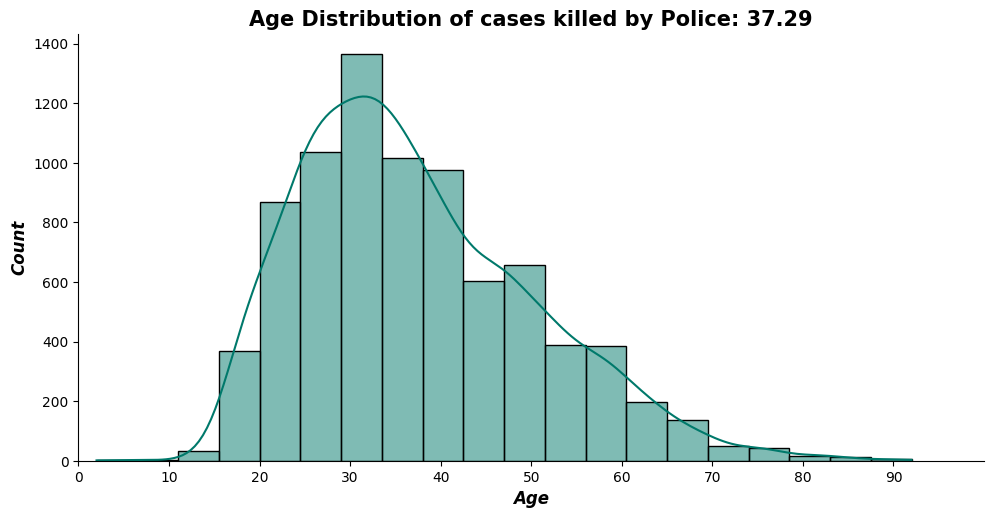

In [ ]:
#Create histogram to illustrate Age distribution of people killed by police
sns.displot(age_known_df,
            x='age',
            bins=20,
            aspect=2,
            kde=True,
            color='#00796b')

plt.title(f'Age Distribution of cases killed by Police: {age_known_df.age.mean():.4}',
          weight='bold',
          fontsize=15)

plt.xlabel('Age',
           fontsize=12,
           weight='bold',
           style='italic')

plt.ylabel('Count',
           fontsize=12,
           weight='bold',
           style='italic')

plt.xticks(ticks = np.arange(0,100,step=10))

plt.xlim(0,100)



plt.show()

Most victims are young and in range from 20 to 40 years old.

### ***Age distribution of each race (KDE)***
Create a seperate KDE plot for each race. Is there a difference between the distributions?

<Figure size 3200x2000 with 0 Axes>

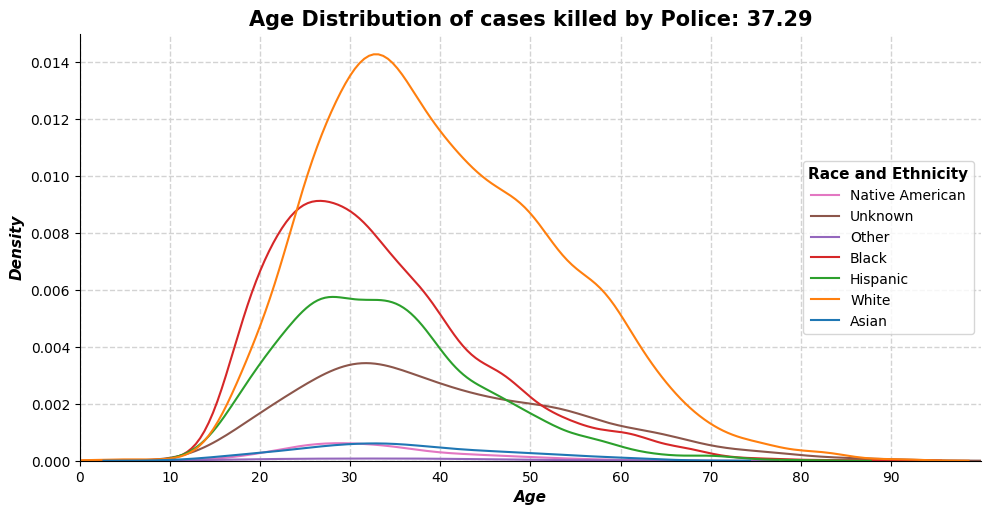

In [ ]:
#Create KDE to show age distribution of each race
plt.figure(figsize=(16,10), dpi=200)

sns.displot(age_known_df,
            x='age',
            aspect=2,
            kind='kde',
            hue='race',
            color='#00796b',
            legend=False)

plt.title(f'Age Distribution of cases killed by Police: {age_known_df.age.mean():.4}',
          weight='bold',
          fontsize=15)

plt.xlabel('Age',
           weight='bold',
           style='italic',
           fontsize=11)

plt.ylabel('Density',
           weight='bold',
           style='italic',
           fontsize=11)

plt.xticks(ticks = np.arange(0,100,step=10))
plt.xlim(0,100)

plt.legend(title="Race and Ethnicity",
           title_fontproperties=dict(size=11,weight='bold'),
           loc='center right',
           labels= ['Native American',
                    'Unknown',
                    'Other',
                    'Black',
                    'Hispanic',
                    'White',
                    'Asian'])

plt.grid(color='lightgrey', linestyle='--', linewidth ='1')

plt.show()

There are no significant different between each race and ethnicity in age distribution of victims.